In [287]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sympy import * 
init_printing()

## Appendix A

### A.4

Use Gram Schmidt Procedure to create an orthonormal basis for the following:

$|e_{1}\rangle=(1+i)\hat{i} + (1)\hat{j}+(i)\hat{k}$

$|e_{2}\rangle=(i)\hat{i} + (3)\hat{j}+(1)\hat{k}$

$|e_{3}\rangle=(0)\hat{i} + (28)\hat{j}+(0)\hat{k}$

Where

$|e_{1}'\rangle=\frac{|e_{1}\rangle}{||e_{1}||}$

Step 1: calculate $||e_{1}||$

$||e_{1}|| = \langle{e_{1}}|{e_{1}}\rangle$

In [163]:
e_1 = Qobj([[complex(1, 1), complex(1, 0), complex(0, 1)]])
e_2 = Qobj([[complex(0, 1), complex(3, 0), complex(1, 0)]])
e_3 = Qobj([[complex(0, 0), complex(28, 0), complex(0, 0)]])

In [164]:
norm = e_1.norm()

In [165]:
norm

2.0

In [215]:
#calculated directly
(e_1.conj()*e_1.trans()).sqrtm()

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[2.]]

Calculate $|e_{1}'\rangle$

In [166]:
e1_prime = e_1/norm
e1_prime

Quantum object: dims = [[1], [3]], shape = (1, 3), type = bra
Qobj data =
[[0.5+0.5j 0.5+0.j  0. +0.5j]]

Find $|e_{2}'\rangle$

Find a vector that is orthogonal to both 

$|e_{2}''\rangle=|e_{2}\rangle-\langle{e_{1}'}|e_{2}\rangle|e_{1}'\rangle$

- Since $|e_{1}'\rangle$ is a row vector (bra), we need to take conjugate before multiplying.
- Since $|e_{2}\rangle$ is a row vector (bra), we need to transpose it to a column when appearing on the RHS of a bracket. 

In [191]:
e1_prime.conj() *e_2.trans()

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[2.]]

In [207]:
e2_dbl_prime = e_2.trans() - e1_prime.conj() *e_2.trans() * e1_prime.trans()

$\langle{e_{2}}''|e_{2}''\rangle$

In [208]:
(e2_dbl_prime.dag() * e2_dbl_prime).sqrtm()

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[2.64575131]]

In [210]:
e2_prime = e2_dbl_prime / ((e2_dbl_prime.dag() * e2_dbl_prime).sqrtm()).norm()

In [211]:
e2_prime

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.37796447+0.j        ]
 [ 0.75592895+0.j        ]
 [ 0.37796447-0.37796447j]]

Find $|e_{3}'\rangle$

Find a vector that is orthogonal to both 

Subtract the projections of $|e_{3}\rangle$ onto $|e_{1}'\rangle$ and $|e_{2}'\rangle$ from $|e_{3}\rangle$

$|e_{3}''\rangle=|e_{3}\rangle-\langle{e_{1}}'|e_{3}\rangle|e_{1}'\rangle-\langle{e_{2}}'|e_{3}\rangle|e_{2}'\rangle$

In [236]:
e3_dbl_prime = e_3.trans()-e1_prime*e_3.trans()*e1_prime.trans()-e2_prime.trans() * e_3.trans()*e2_prime

In [237]:
e3_prime = e3_dbl_prime / ((e3_dbl_prime.dag() * e3_dbl_prime).sqrtm()).norm()

In [238]:
e3_prime

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.08451543-0.59160798j]
 [ 0.42257713+0.j        ]
 [-0.6761234 +0.08451543j]]

### A.8

${A}=\begin{pmatrix}
-1 & 1 & i\\
2 & 0 & 3\\
2i & -2i & 2
\end{pmatrix}$

${B}=\begin{pmatrix}
2 & 0 & -i\\
0 & 1 & 0\\
1 & 3 & 2
\end{pmatrix}$

a) $A + B$

In [245]:
A = Qobj([[complex(-1, 0), complex(1, 0),
           complex(0, 1)], [complex(2, 0),
                            complex(0, 0),
                            complex(3, 0)],
          [complex(0, 2), complex(0, -2),
           complex(2, 0)]])
A

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[-1.+0.j  1.+0.j  0.+1.j]
 [ 2.+0.j  0.+0.j  3.+0.j]
 [ 0.+2.j  0.-2.j  2.+0.j]]

In [265]:
B = Qobj([[complex(2, 0), complex(0, 0),
           complex(0, -1)], [complex(0, 0),
                            complex(1, 0),
                            complex(0, 0)],
          [complex(0, 1), complex(3, 0),
           complex(2, 0)]])
B

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[2.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 1.+0.j 0.+0.j]
 [0.+1.j 3.+0.j 2.+0.j]]

In [266]:
C = A + B
C

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[1.+0.j 1.+0.j 0.+0.j]
 [2.+0.j 1.+0.j 3.+0.j]
 [0.+3.j 3.-2.j 4.+0.j]]

b) = $AB$

In [267]:
A*B

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[-3.+0.j  1.+3.j  0.+3.j]
 [ 4.+3.j  9.+0.j  6.-2.j]
 [ 0.+6.j  6.-2.j  6.+0.j]]

$BA$

In [268]:
B*A

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.+0.j  0.+0.j  0.+0.j]
 [ 2.+0.j  0.+0.j  3.+0.j]
 [ 6.+3.j  0.-3.j 12.+0.j]]

c) = $[A,B]$

In [269]:
commutator(A,B)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[-3.+0.j  1.+3.j  0.+3.j]
 [ 2.+3.j  9.+0.j  3.-2.j]
 [-6.+3.j  6.+1.j -6.+0.j]]

d) = $\tilde{A}$

In [270]:
A.trans()

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[-1.+0.j  2.+0.j  0.+2.j]
 [ 1.+0.j  0.+0.j  0.-2.j]
 [ 0.+1.j  3.+0.j  2.+0.j]]

e) = $A^{*}$

In [273]:
A.conj()

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[-1.+0.j  1.+0.j  0.-1.j]
 [ 2.+0.j  0.+0.j  3.+0.j]
 [ 0.-2.j  0.+2.j  2.+0.j]]

f) = $A^{\dagger}$

In [274]:
A.dag()

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[-1.+0.j  2.+0.j  0.-2.j]
 [ 1.+0.j  0.+0.j  0.+2.j]
 [ 0.-1.j  3.+0.j  2.+0.j]]

AttributeError: 'Qobj' object has no attribute 'det'

### Messing With Sympy :)

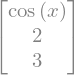

In [289]:
x = symbols("x")
Matrix([cos(x), 2, 3])

In [279]:
from sympy.plotting import plot

In [292]:
p1 = plot(cos(x), show=False)
p2 = plot(sin(x), show=False)
p1.append(p2[0])
p1

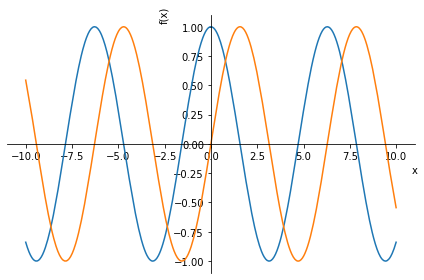

In [293]:
p1.show()

### Problem 2.22: Free Particle

In [349]:
x = symbols('x')
a = symbols('a', positive=True)

In [350]:
g = exp(-a*(x**2))
g

In [351]:
from sympy.physics.quantum.state import Wavefunction

In [352]:
f = Wavefunction(g, x)

In [357]:
f_norm = f.normalize()

In [359]:
f_norm.is_normalized

True

In [355]:
f.limits

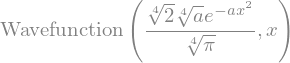

In [360]:
f_norm

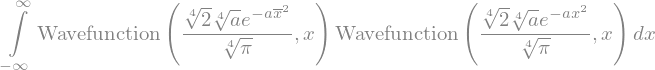

In [374]:
integrate(f_norm.adjoint() * f_norm, (x,-np.inf, np.inf))

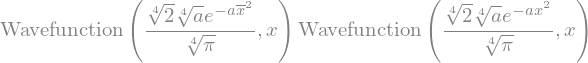

In [373]:
f_norm.adjoint() * f_norm